In [1]:
#Dependencies
import json
import tweepy
from pprint import pprint
import matplotlib.pyplot as plt
% matplotlib notebook
import numpy as np
import pandas as pd

# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [68]:
#Target User
target_user = ["BBC","CBS","CNN","FOX","New York times"]

In [9]:
#BBC analysis
# Counter
counter = 1
# Variables for holding sentiments
bbc_sentiments = []
# Variable for max_id
oldest_tweet = None
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    # Get all tweets from home feed
    public_tweets = api.user_timeline("BBC", max_id = oldest_tweet)
    # Loop through all tweets 
    for tweet in public_tweets:       
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        bbc_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Tweets Ago": counter})
        # Add to counter 
        counter += 1
bbc_df = pd.DataFrame(bbc_sentiments)

In [10]:
#CBS analysis
# Counter
counter = 1
# Variables for holding sentiments
cbs_sentiments = []
# Variable for max_id
oldest_tweet = None
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    # Get all tweets from home feed
    public_tweets = api.user_timeline("CBS", max_id = oldest_tweet)
    # Loop through all tweets 
    for tweet in public_tweets:       
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        cbs_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Tweets Ago": counter})
        # Add to counter 
        counter += 1
cbs_df = pd.DataFrame(cbs_sentiments)

In [16]:
#CNN analysis
# Counter
counter = 1
# Variables for holding sentiments
cnn_sentiments = []
# Variable for max_id
oldest_tweet = None
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    # Get all tweets from home feed
    public_tweets = api.user_timeline("CNN", max_id = oldest_tweet)
    # Loop through all tweets 
    for tweet in public_tweets:       
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        cnn_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Tweets Ago": counter})
        # Add to counter 
        counter += 1
cnn_df = pd.DataFrame(cnn_sentiments)

In [11]:
#FOX analysis
# Counter
counter = 1
# Variables for holding sentiments
fox_sentiments = []
# Variable for max_id
oldest_tweet = None
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    # Get all tweets from home feed
    public_tweets = api.user_timeline("FOX", max_id = oldest_tweet)
    # Loop through all tweets 
    for tweet in public_tweets:       
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        fox_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Tweets Ago": counter})
        # Add to counter 
        counter += 1
fox_df = pd.DataFrame(fox_sentiments)

In [77]:
#NY Time analysis
# Counter
counter = 1
# Variables for holding sentiments
ny_sentiments = []
# Variable for max_id
oldest_tweet = None
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    # Get all tweets from home feed
    public_tweets = api.user_timeline("nytimes", max_id = oldest_tweet)
    # Loop through all tweets 
    for tweet in public_tweets:       
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        ny_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Tweets Ago": counter})
        # Add to counter 
        counter += 1
ny_df = pd.DataFrame(ny_sentiments)
ny_df.to_csv("sentiment_analysis.csv")

In [78]:
x_vals = bbc_df["Tweets Ago"]
bbc_vals = bbc_df["Compound"]

In [79]:
x_vals = cnn_df["Tweets Ago"]
cnn_vals = cnn_df["Compound"]

In [80]:
x_vals = cbs_df["Tweets Ago"]
cbs_vals = cbs_df["Compound"]

In [81]:
x_vals = ny_df["Tweets Ago"]
ny_vals = ny_df["Compound"]

In [82]:
x_vals = fox_df["Tweets Ago"]
fox_vals = fox_df["Compound"]

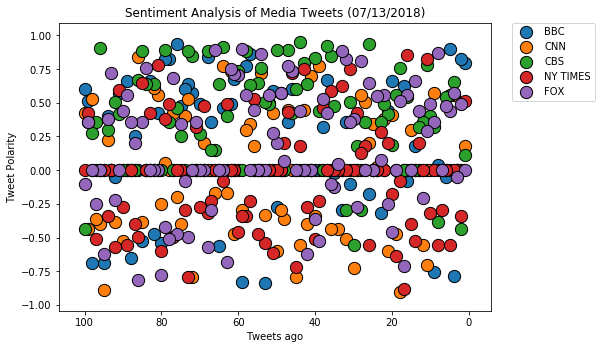

In [83]:
# plot of the data
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1,1, 1])
ax.scatter(x_vals,bbc_vals,marker="o",s=150,edgecolors  = "black",
         alpha=1,label='BBC')
ax.scatter(x_vals,cnn_vals,marker="o",s=150,edgecolors  = "black",
         alpha=1,label='CNN')
ax.scatter(x_vals,cbs_vals,marker="o",s=150,edgecolors  = "black",
         alpha=1,label='CBS')
ax.scatter(x_vals,ny_vals,marker="o",s=150,edgecolors  = "black",
         alpha=1,label='NY TIMES')
ax.scatter(x_vals,fox_vals,marker="o",s=150,edgecolors  = "black",
         alpha=1,label='FOX')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.gca().invert_xaxis()
plt.xlabel("Tweets ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (07/13/2018)")
plt.savefig("sentiment_analysis.png")

In [84]:
bbc_avg = bbc_vals.mean()
cnn_avg = cnn_vals.mean()
cbs_avg = cbs_vals.mean()
ny_avg = ny_vals.mean()
fox_avg = fox_vals.mean()


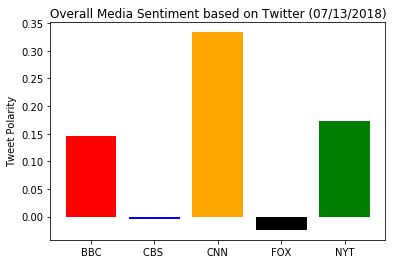

In [85]:
objects = ('BBC', 'CBS ','CNN', 'FOX', 'NYT')
performance = [bbc_avg,cnn_avg,cbs_avg,ny_avg,fox_avg]
color = ["Red","Blue","Orange","Black","Green"]
plt.bar(objects, performance,color=color)
plt.title('Overall Media Sentiment based on Twitter (07/13/2018)')
plt.ylabel('Tweet Polarity')
plt.savefig("compound_mean.png")